# 1. Introduction

## 1.1 Problem Description

XYZ is a courier company. As we appreciate that human capital plays an important role in collection, transportation and delivery. The company is passing through genuine issue of Absenteeism. The company has shared it dataset and requested to have an answer on the following areas:

 **1** . What changes company should bring to reduce the number of absenteeism? <br>
 **2** . How much losses every month can we project in 2011 if same trend of absenteeism continues? <br>

## 1.2 Data

Our task is to build a regression model which will predict the absentieesm in hours based on the employee attributes and information. Although, the problem statement is a Multivariate Time-Series Problem. We will approach it as a Regression Problem.

## 1.3 Performance Metric

**RMSE :** <br>
<br>
Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are, RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. <br>
<br>
Also, Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. So, RMSE are more useful when large errors are particularly undesirable.

# 2. Exploratory Data Analysis

In [1]:
import os
os.chdir("/Users/akash/Desktop/Project 2 -Employe Absenteism")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from collections import Counter
from scipy.sparse import hstack
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold 
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

from sklearn import model_selection

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold, cross_val_score
from fancyimpute import KNN 


/Users/akash/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/akash/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 2.1 Reading Data

In [3]:
data = pd.read_excel("Absenteeism_at_work_Project.xls")

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
data.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [6]:
print("Shape of the data is {}" . format(data.shape))

Shape of the data is (740, 21)


In [7]:
print(data.columns)
print("-"*80)
print("Total number of Features is : {}" .format(len(data.columns)))

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')
--------------------------------------------------------------------------------
Total number of Features is : 21


In [8]:
data.columns = data.columns.str.replace(' ', '_')
print(data.columns)

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')


** Inference :** <br>
The data contains 740 data points and 21 features.

## 2.2 Class Distribution

In [9]:
data.nunique()

ID                                 36
Reason_for_absence                 28
Month_of_absence                   13
Day_of_the_week                     5
Seasons                             4
Transportation_expense             24
Distance_from_Residence_to_Work    25
Service_time                       18
Age                                22
Work_load_Average/day_             38
Hit_target                         13
Disciplinary_failure                2
Education                           4
Son                                 5
Social_drinker                      2
Social_smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body_mass_index                    17
Absenteeism_time_in_hours          19
dtype: int64

In [10]:
data["Absenteeism_time_in_hours"].value_counts()

8.0      199
2.0      155
3.0      110
1.0       88
4.0       60
0.0       36
16.0      19
24.0      16
40.0       7
5.0        7
32.0       5
64.0       3
80.0       3
120.0      3
56.0       2
112.0      2
104.0      1
7.0        1
48.0       1
Name: Absenteeism_time_in_hours, dtype: int64

/Users/akash/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


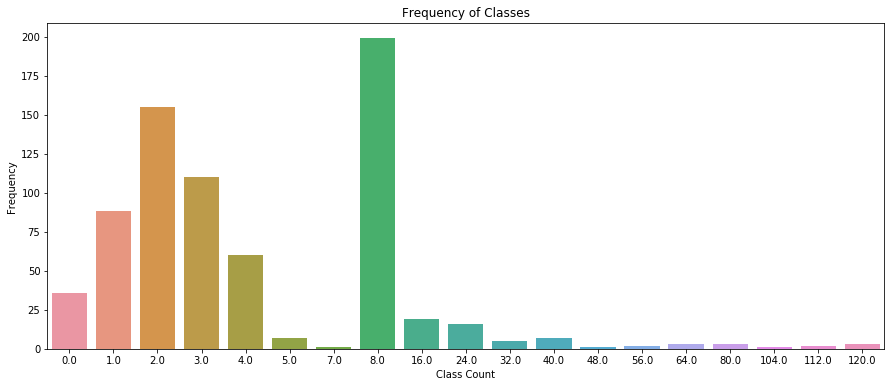

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.mpl.rc("figure", figsize=(15,6))
sns.countplot(x="Absenteeism_time_in_hours", data= data)
dim = (4,6)
plt.ylabel('Frequency')
plt.xlabel('Class Count')
plt.title("Frequency of Classes")
plt.show()

**INFERENCE :**
 - From the above plot, it is obvious that maximum number (i.e around 200) of employes are absent for 8 hours.
 - Around 420 employes are absent for 1 to 4 hours.
 - Only 36 employes doesnt take any leave.
 - There are only 27 employes, who take leave for 40-120 hours

One observation that is worth noting from the above plot is that, after class 8, every other class is a multiple of 8


## 2.3 Missing Values

In [12]:
missing_val = pd.DataFrame(data.isnull().sum())
print(missing_val)

                                  0
ID                                0
Reason_for_absence                3
Month_of_absence                  1
Day_of_the_week                   0
Seasons                           0
Transportation_expense            7
Distance_from_Residence_to_Work   3
Service_time                      3
Age                               3
Work_load_Average/day_           10
Hit_target                        6
Disciplinary_failure              6
Education                        10
Son                               6
Social_drinker                    3
Social_smoker                     4
Pet                               2
Weight                            1
Height                           14
Body_mass_index                  31
Absenteeism_time_in_hours        22


In [13]:
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns  = {'index' : 'variables' , 0 : 'missing_percentage' })
missing_val["missing_percentage"] =  (missing_val["missing_percentage"] / len(data))*100
missing_val = missing_val.sort_values('missing_percentage', ascending= False).reset_index(drop = True)

In [14]:
missing_val

,variables,missing_percentage
0,Body_mass_index,4.189189
1,Absenteeism_time_in_hours,2.972973
2,Height,1.891892
3,Work_load_Average/day_,1.351351
4,Education,1.351351
5,Transportation_expense,0.945946
6,Son,0.810811
7,Disciplinary_failure,0.810811
8,Hit_target,0.810811
9,Social_smoker,0.540541


In [15]:
# Droping observation in which "Absenteeism time in hours" has missing value
data = data.drop(data[data['Absenteeism_time_in_hours'].isnull()].index, axis=0)
print(data.shape)
print(data['Absenteeism_time_in_hours'].isnull().sum())

(718, 21)
0


In [16]:
# let's go ahead and have a look at how many observations we would drop
print('Total employes with values in all variables: ', data.dropna().shape[0])
print('Total employes in the company: ', data.shape[0])
print('Percentage of data without missing values: ', data.dropna().shape[0]/ np.float(data.shape[0]))

Total employes with values in all variables:  639
Total employes in the company:  718
Percentage of data without missing values:  0.8899721448467967


In [17]:
## Imputing Missing Values using KNN imputation
data = pd.DataFrame(KNN(k = 3).complete(data), columns = data.columns)

Imputing row 1/718 with 0 missing, elapsed time: 0.168
Imputing row 101/718 with 1 missing, elapsed time: 0.172
Imputing row 201/718 with 0 missing, elapsed time: 0.174
Imputing row 301/718 with 0 missing, elapsed time: 0.175
Imputing row 401/718 with 0 missing, elapsed time: 0.177
Imputing row 501/718 with 1 missing, elapsed time: 0.178
Imputing row 601/718 with 0 missing, elapsed time: 0.179
Imputing row 701/718 with 0 missing, elapsed time: 0.180


In [18]:
data.isnull().sum()

ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day_             0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64

## 2.4 Data Statistics

In [19]:
print("Unique values Per Feature")
print("-"*25)
pd.DataFrame(data.nunique()).T

Unique values Per Feature
-------------------------


,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,36,31,14,5,4,30,28,18,24,46,17,2,8,8,4,2,7,27,26,45,19


In [20]:
data.describe()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,17.981894,19.418432,6.270195,3.899721,2.532033,220.654277,29.577747,12.584958,36.467701,271326.328644,94.611423,0.045961,1.296657,1.011083,0.563578,0.071031,0.742340,79.059889,172.092308,26.702320,6.977716
std,11.035935,8.288079,3.440181,1.419519,1.105813,66.059450,14.787993,4.371251,6.477668,38786.956678,3.799468,0.209547,0.678225,1.088586,0.495913,0.257055,1.310473,12.867657,6.004716,4.272132,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.750000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,291876.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


## 2.5 Data Visualisation

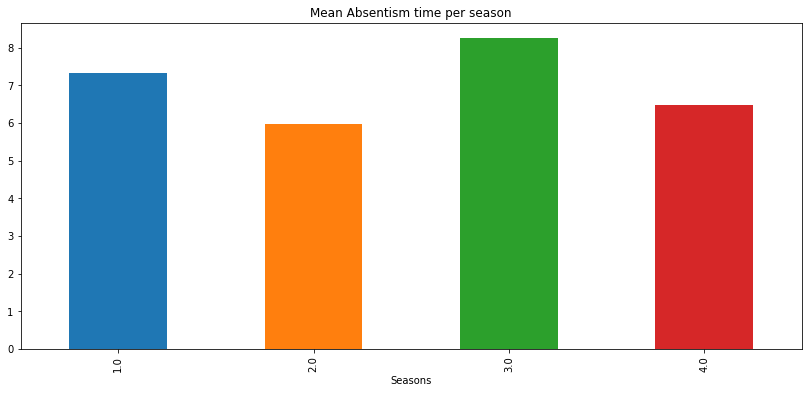

In [21]:
data.groupby('Seasons')['Absenteeism_time_in_hours'].mean().plot(kind='bar',title='Mean Absentism time per season',figsize=(14,6))
plt.show()

**Inference :**
From the above plot, It can be observed that the absence rate of employees is maximum in the third season which is 'Winter', followed by first, fourth and second which is 'summer', 'spring', 'autumn' respectively.

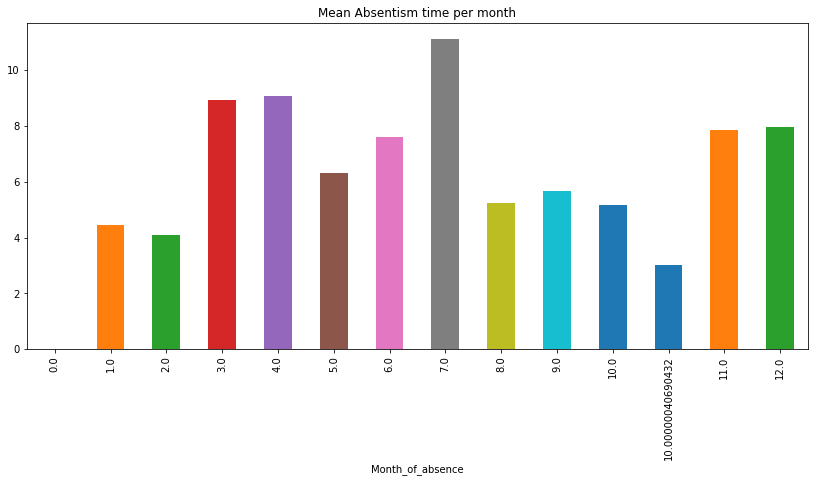

In [22]:
data.groupby('Month_of_absence')['Absenteeism_time_in_hours'].mean().plot(kind='bar',title='Mean Absentism time per month',figsize=(14,6))
plt.show()

**Inference :** <br>
From the above plot, It can be observed that the absence rate of employees is maximum in the month 7 which is 'July', followed by month 4, 3 , 12, 11, 6 ,5  which is 'April', 'March', 'December', 'June' and 'May' respectively.

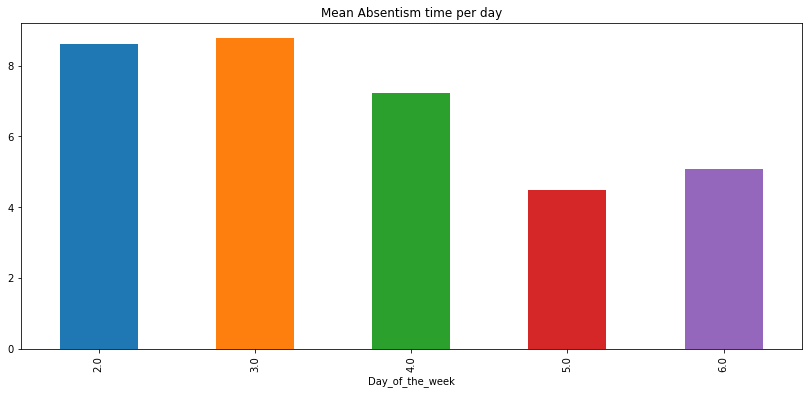

In [23]:
data.groupby('Day_of_the_week')['Absenteeism_time_in_hours'].mean().plot(kind='bar',title='Mean Absentism time per day',figsize=(14,6))
plt.show()

**Inference :** <br>
From the above plot, It can be observed that the absence rate of employees is maximum at day 3 which is 'Tuesday', followed by day 2,4,6,5  which is 'Monday', 'Wednesday', 'Friday' and 'Thursday' respectively.

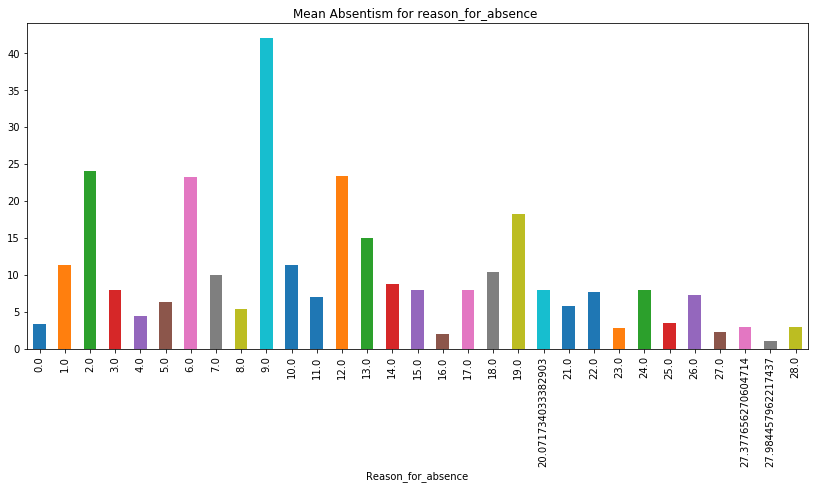

In [24]:
data.groupby('Reason_for_absence')['Absenteeism_time_in_hours'].mean().plot(kind='bar',title='Mean Absentism for reason_for_absence ',figsize=(14,6))
plt.show()

**Inference :** <br>
From the above plot, It can be observed that the absence rate of employees is maximum due to the reason of 'Diseases of the circulatory system' followed by 'Neoplasms', 'Diseases of the nervous system', 'Diseases of the skin and subcutaneous tissue' and 'Injury, poisoning and certain other consequences of external causes'

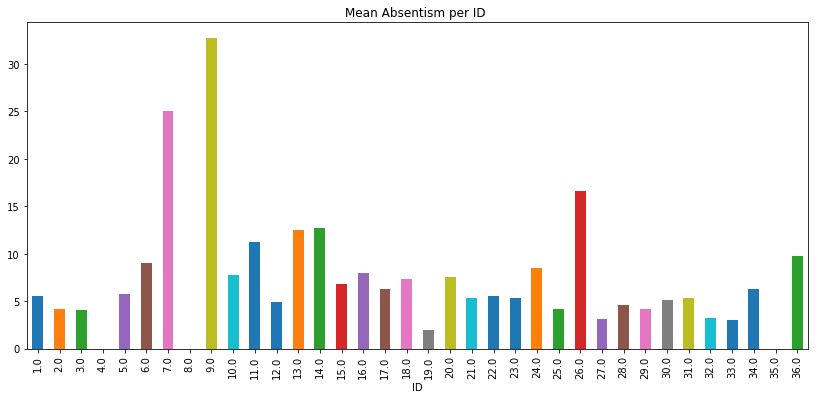

In [25]:
data.groupby('ID')['Absenteeism_time_in_hours'].mean().plot(kind='bar',title='Mean Absentism per ID ',figsize=(14,6))
plt.show()

**Inference :** <br>
 - From the above plot, It can be observed that the absence rate is maximum for employee with ID : 9, followed by employyes with ID : 7,26,14,13, 36, 11 and 6.
 - Employee with employee ID : 4,8 and 35 never absents and are very much regular to work

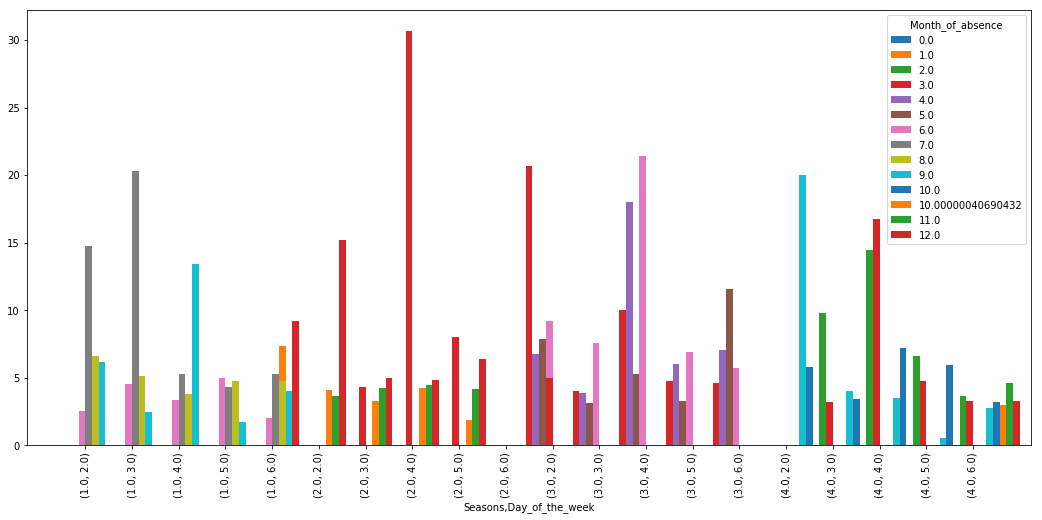

In [26]:
a = data.pivot_table(values = 'Absenteeism_time_in_hours' , index = ['Seasons','Day_of_the_week'], columns = ['Month_of_absence'] )
a.plot(kind ='bar',width = 2, figsize= (18, 8))

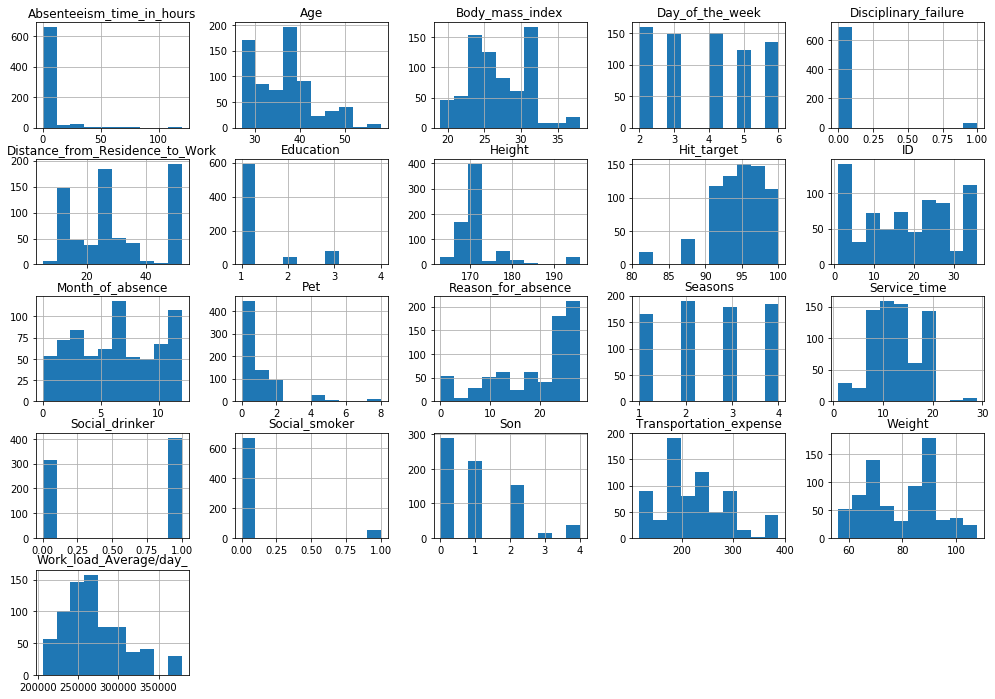

In [27]:
from matplotlib import pyplot
data.hist(figsize=(17,12))
pyplot.show()

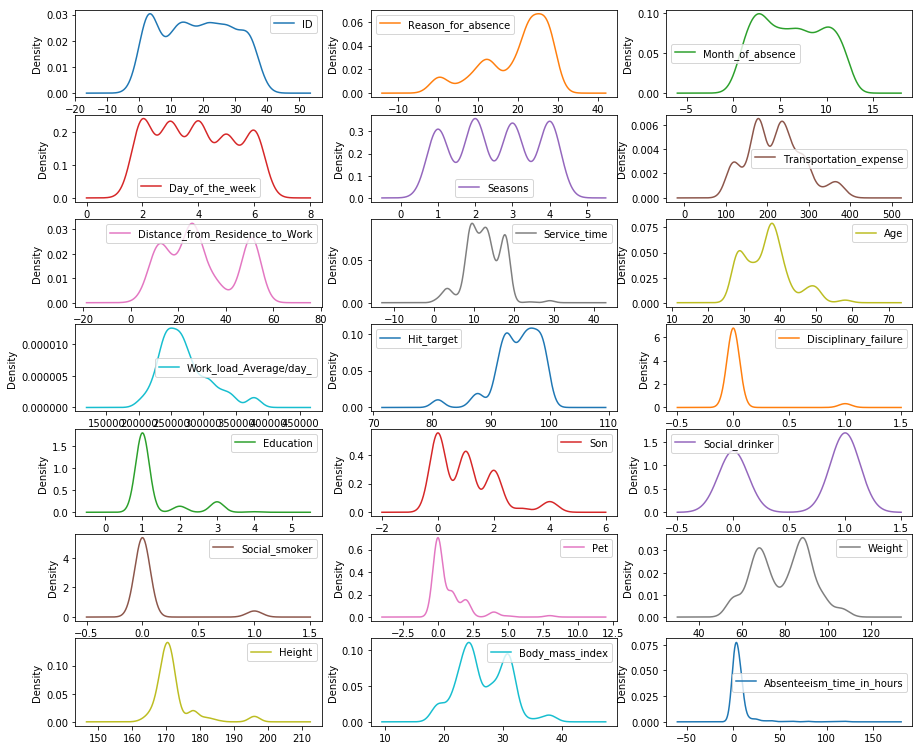

In [28]:
import matplotlib.pyplot as plt
data.plot(kind='density', subplots=True, layout=(8,3), sharex=False) 
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top= 2,wspace=0.2, hspace=0.2)
pyplot.show()

**Inference :** <br>
From the above plot, It can be observed that none of the features follow Normal distribution. Every feature follows some random distribution.

## 2.6 Outliers detection

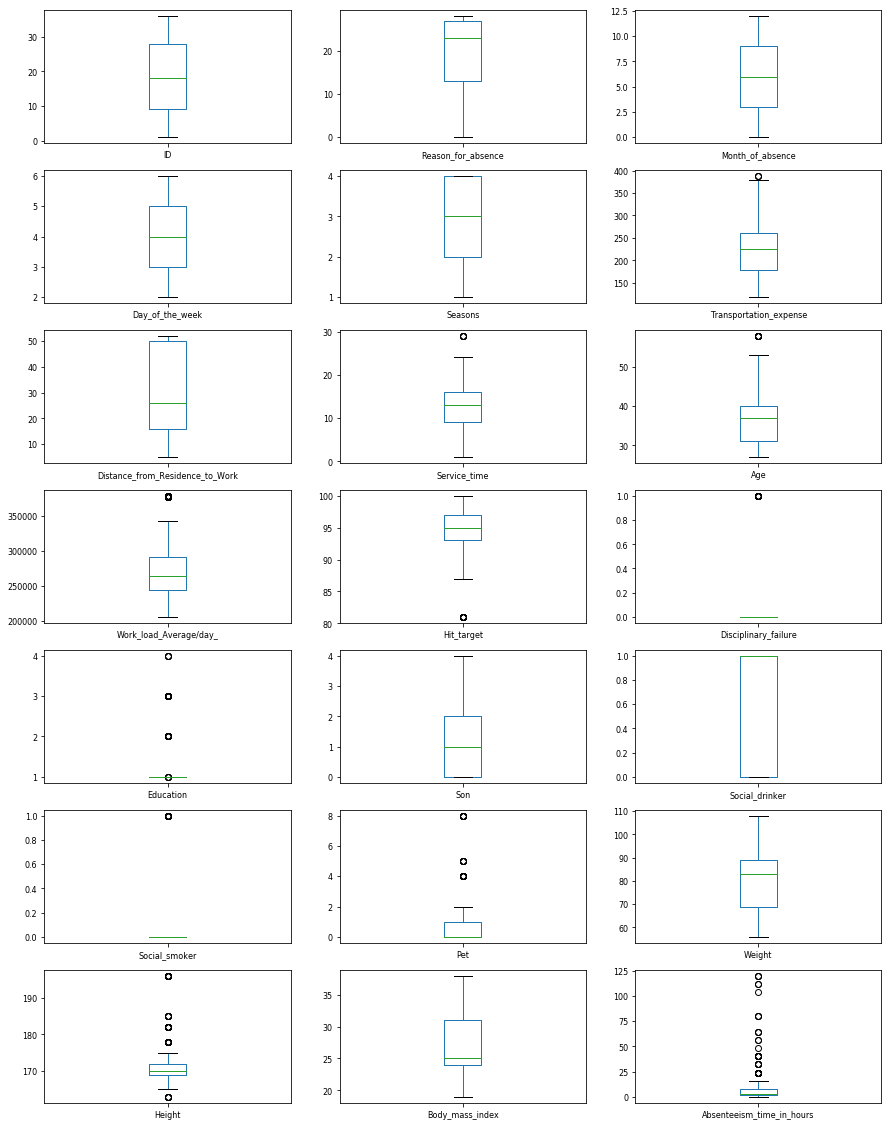

In [29]:
data.plot(kind='box', subplots=True, layout=(8,3), sharex=False, sharey=False, fontsize=8)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top= 3,wspace=0.2, hspace=0.2)
pyplot.show()

Our dataset contains both Continuous and Categorical Fetaures. So, lets split the features into categorical and Continuous so that it becomes easy to visualise the outliers.

**Inference : ** <br>
So, From the above box plot, we can see that not all the continuos features contains outliers. 
 - Features like 'ID', 'Seasons', 'Month_of_absense', 'Day_of_the week', 'Distance_from_residence_to_work', 'Body_mass_index' does not contains any Outliers at all.
 - Features like  'Service_time', 'Work_load_Average\day, 'Transportation_expense', 'Hit_target', contains a few outliers.
 - It can also be seen that features like 'Absenteeism_time_in_hours', 'Height' contains the most number of outliers.

In [30]:
from fancyimpute import KNN 
cnames =['Service_time', 'Age', 'Work_load_Average/day_', 'Transportation_expense',
       'Hit_target', 'Height', 'Absenteeism_time_in_hours']       

for i in cnames:
    
    q75, q25 = np.percentile(data[i], [75,25])       # Getting 75th and 25th Percentile
    iqr = q75 - q25                                  # Calculating Interquartile range
    
    lower_fence = q25 - (iqr*1.5)                    # upper fence
    upper_fence = q75 + (iqr*1.5)                    # Lower fence
    
    data.loc[data[i]< lower_fence,i] = np.nan        # Replacing the values with NA
    data.loc[data[i]> upper_fence,i] = np.nan


data = pd.DataFrame(KNN(k = 3).complete(data), columns = data.columns) # Imputing missing values with KNN
data.isnull().sum().sum()  # Checking if there is any missing value

Imputing row 1/718 with 0 missing, elapsed time: 0.152
Imputing row 101/718 with 0 missing, elapsed time: 0.154
Imputing row 201/718 with 1 missing, elapsed time: 0.155
Imputing row 301/718 with 0 missing, elapsed time: 0.158
Imputing row 401/718 with 0 missing, elapsed time: 0.160
Imputing row 501/718 with 0 missing, elapsed time: 0.162
Imputing row 601/718 with 2 missing, elapsed time: 0.164
Imputing row 701/718 with 0 missing, elapsed time: 0.167


0

#### Box Plot after dealing with Outliers

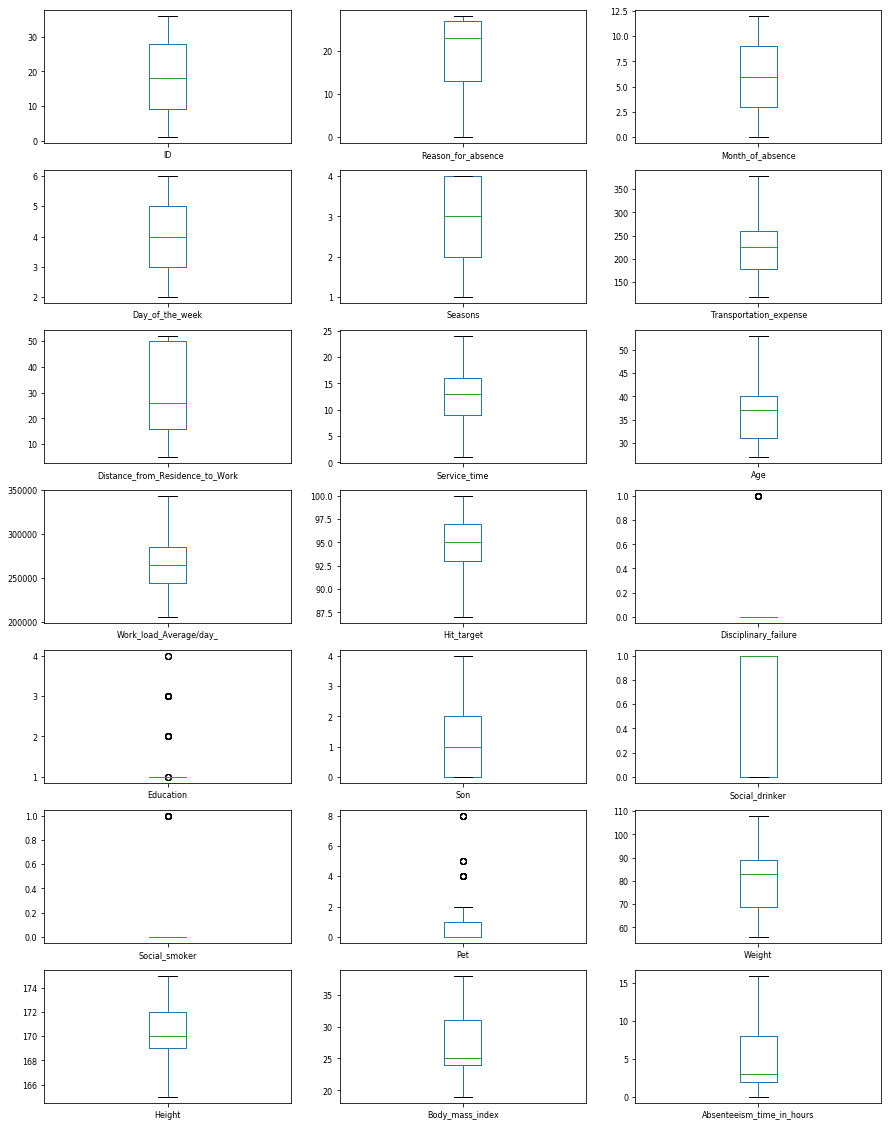

In [31]:
data.plot(kind='box', subplots=True, layout=(8,3), sharex=False, sharey=False, fontsize=8)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top= 3,wspace=0.2, hspace=0.2)
pyplot.show()

In [32]:
data.isnull().sum()

ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day_             0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64

In [33]:
data_loss = data.copy()

## 2.7 Handling Categorical Features

In [34]:
Seasons_dummies = pd.get_dummies(data.Seasons , drop_first=True , prefix = 'Seasons')
month_of_absence_dummies = pd.get_dummies(data.Month_of_absence , drop_first=True , prefix = 'Month_of_absence')
day_of_week_dummies = pd.get_dummies(data.Day_of_the_week , drop_first= True , prefix = 'Day_of_the_week')
Reason_for_absence_dummies = pd.get_dummies(data.Reason_for_absence , drop_first= True , prefix = 'Reason_for_absence')
ID_dummies = pd.get_dummies(data.ID , drop_first= True , prefix = 'ID')
Education_dummies = pd.get_dummies(data.Education , drop_first= True , prefix = 'Education')
Pet_dummies = pd.get_dummies(data.Pet , drop_first= True , prefix = 'Pet')
Son_dummies = pd.get_dummies(data.Pet , drop_first= True , prefix = 'Son')

In [35]:
data = pd.concat([data , Seasons_dummies], axis = 1)
data = pd.concat([data , month_of_absence_dummies], axis = 1)
data = pd.concat([data , day_of_week_dummies], axis = 1)
data = pd.concat([data , Reason_for_absence_dummies], axis = 1)
data = pd.concat([data , ID_dummies], axis = 1)
data = pd.concat([data ,Education_dummies ], axis = 1)
data = pd.concat([data ,Pet_dummies ], axis = 1)
data = pd.concat([data ,Son_dummies ], axis = 1)

In [36]:
data.drop('Seasons', axis=1, inplace=True)
data.drop('Month_of_absence', axis=1, inplace=True)
data.drop('Day_of_the_week', axis=1, inplace=True)
data.drop('Reason_for_absence', axis=1, inplace=True)
data.drop('ID', axis=1, inplace=True)
data.drop('Education', axis=1, inplace=True)
data.drop('Pet', axis=1, inplace=True)
data.drop('Son', axis=1, inplace=True)

In [37]:
data.shape

(718, 117)

## Splittng The data

In [38]:
X_train = data.loc[:,data.columns != 'Absenteeism_time_in_hours']
y_train = data['Absenteeism_time_in_hours']

## 2.8 Feature Scaling 

In [39]:
for i in X_train.columns:
    X_train[i] = (X_train[i] - X_train[i].min())/ (X_train[i].max() - X_train[i].min())

/Users/akash/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
X_train.head(5)

,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Social_drinker,Social_smoker,Weight,Height,Body_mass_index,Seasons_2.0,Seasons_3.0,Seasons_4.0,Month_of_absence_1.0,Month_of_absence_2.0,Month_of_absence_3.0,Month_of_absence_4.0,Month_of_absence_5.0,Month_of_absence_6.0,Month_of_absence_7.0,Month_of_absence_8.0,Month_of_absence_9.0,Month_of_absence_10.0,Month_of_absence_10.00000040690432,Month_of_absence_11.0,Month_of_absence_12.0,Day_of_the_week_3.0,Day_of_the_week_4.0,Day_of_the_week_5.0,Day_of_the_week_6.0,Reason_for_absence_1.0,Reason_for_absence_2.0,Reason_for_absence_3.0,Reason_for_absence_4.0,Reason_for_absence_5.0,Reason_for_absence_6.0,Reason_for_absence_7.0,Reason_for_absence_8.0,Reason_for_absence_9.0,Reason_for_absence_10.0,Reason_for_absence_11.0,Reason_for_absence_12.0,Reason_for_absence_13.0,Reason_for_absence_14.0,Reason_for_absence_15.0,Reason_for_absence_16.0,Reason_for_absence_17.0,Reason_for_absence_18.0,Reason_for_absence_19.0,Reason_for_absence_20.071734033382903,Reason_for_absence_21.0,Reason_for_absence_22.0,Reason_for_absence_23.0,Reason_for_absence_24.0,Reason_for_absence_25.0,Reason_for_absence_26.0,Reason_for_absence_27.0,Reason_for_absence_27.377656270604714,Reason_for_absence_27.984457962217437,Reason_for_absence_28.0,ID_2.0,ID_3.0,ID_4.0,ID_5.0,ID_6.0,ID_7.0,ID_8.0,ID_9.0,ID_10.0,ID_11.0,ID_12.0,ID_13.0,ID_14.0,ID_15.0,ID_16.0,ID_17.0,ID_18.0,ID_19.0,ID_20.0,ID_21.0,ID_22.0,ID_23.0,ID_24.0,ID_25.0,ID_26.0,ID_27.0,ID_28.0,ID_29.0,ID_30.0,ID_31.0,ID_32.0,ID_33.0,ID_34.0,ID_35.0,ID_36.0,Education_0.9999999910449356,Education_1.0,Education_1.0000000046716917,Education_1.0000000613102742,Education_2.0,Education_3.0,Education_4.0,Pet_1.0,Pet_1.0000000061366812,Pet_2.0,Pet_4.0,Pet_5.0,Pet_8.0,Son_1.0,Son_1.0000000061366812,Son_2.0,Son_4.0,Son_5.0,Son_8.0
0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.0,1.0,0.0,0.653846,0.700000,0.578947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.170213,0.739130,0.884615,0.244925,0.769231,1.0,1.0,0.0,0.807692,0.500001,0.631579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.234615,0.978723,0.739130,0.423077,0.244925,0.769231,0.0,1.0,0.0,0.634615,0.500000,0.631579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.619231,0.000000,0.565217,0.461538,0.244925,0.769231,0.0,1.0,1.0,0.230769,0.300000,0.263158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.0,1.0,0.0,0

In [41]:
X_train.shape

(718, 116)

## 2.9 PCA Visualisation Of the data

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
y_Pca = pca.fit_transform(X_train)

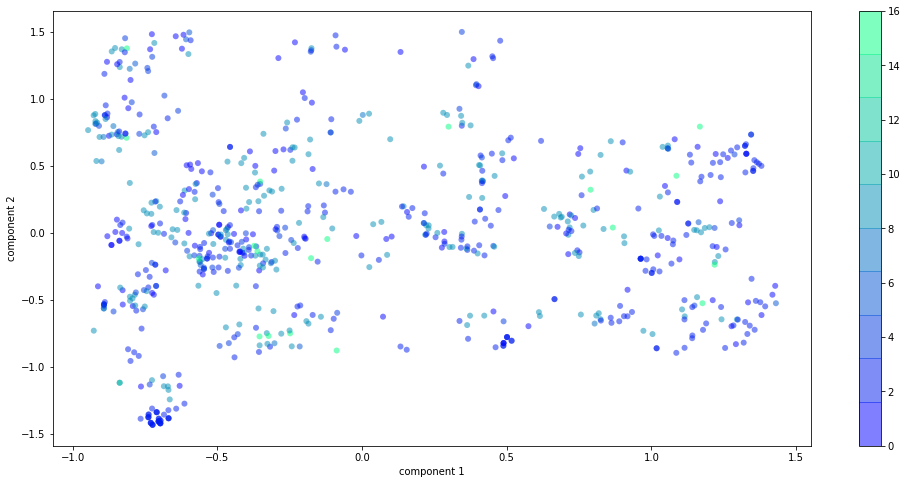

In [43]:
plt.scatter(y_Pca[:, 0], y_Pca[:, 1],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('winter', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.gcf().set_size_inches((17, 8)) 
plt.colorbar();

**Inference : ** <br>
From the above plot, we can observe that there are three cluster of points and concentrated around a space.

## 2.10 Feature Selection

#### Removing Correlated Features

In [44]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  12


In [45]:
X_train.drop(labels=corr_features, axis=1, inplace=True)

/Users/akash/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


** Dimensionality Reduction using PCA **

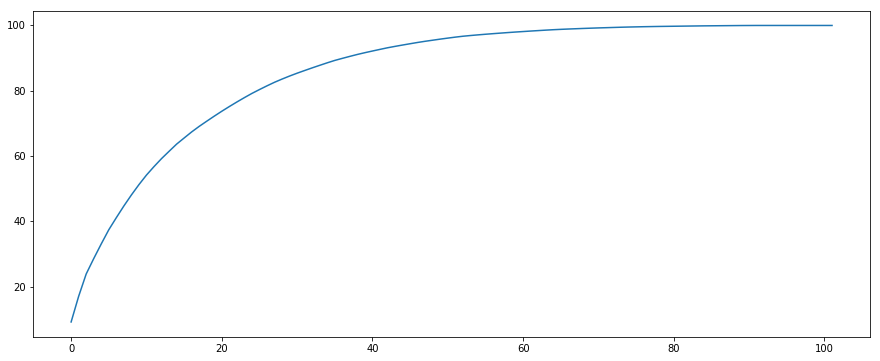

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=102)
pca.fit(X_train)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)
plt.show()

**Inference :** <br>
We can see that, almost 98%+ variance is explained by just 45 variables. S0, we will reduce the components to 45.

In [47]:
pca = PCA(n_components=45)
X = pca.fit(X_train).transform(X_train)
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.2)

In [48]:
X_train.shape

(574, 45)

In [49]:
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

# 3. Model Selection

## 3.1 KNN Regressor

In [83]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [84]:
from sklearn.neighbors import KNeighborsRegressor
def train_KNN(n_neigh):
    knn = KNeighborsRegressor(n_neighbors= n_neigh)
    knn_model = knn.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    print('n_neighbours : {}  ----KNN rmse: {}'.format(n_neigh,(sqrt(mean_squared_error(y_test,y_pred)))))

In [85]:
for n_neigh in [3,5,7,10,15,20,25,30]:
    train_KNN(n_neigh)

n_neighbours : 3  ----KNN rmse: 3.2771303320204117
n_neighbours : 5  ----KNN rmse: 3.2969532623884037
n_neighbours : 7  ----KNN rmse: 3.133879386133967
n_neighbours : 10  ----KNN rmse: 3.1491079321856175
n_neighbours : 15  ----KNN rmse: 3.1806522911087223
n_neighbours : 20  ----KNN rmse: 3.2365215265617078
n_neighbours : 25  ----KNN rmse: 3.295862770277186
n_neighbours : 30  ----KNN rmse: 3.298778697933586


In [86]:
KNN_model = KNeighborsRegressor(n_neighbors= 7).fit(X_train , y_train)
KNN_pred_train = KNN_model.predict(X_train)
KNN_pred= KNN_model.predict(X_test)

In [87]:
print("Train Data")
print('n_neighbours : {}  ----KNN rmse: {}'.format(n_neigh,  (sqrt(mean_squared_error(y_train,KNN_pred_train)))))
print("Test Data")
print('n_neighbours : {}  ----KNN rmse: {}'.format(n_neigh,  (sqrt(mean_squared_error(y_test,KNN_pred)))))

Train Data
n_neighbours : 30  ----KNN rmse: 2.569442138772699
Test Data
n_neighbours : 30  ----KNN rmse: 3.133879386133967


## 3.2 Multiple Linear Regression

### 3.2.1 Ordinary Least Squares

In [88]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols_model = ols.fit(X_train, y_train)
y_pred_train = ols_model.predict(X_train)
y_pred = ols_model.predict(X_test)

In [89]:
print("Train Data")
print('Ordinary Least Squares rmse: {}'.format(sqrt(mean_squared_error(y_train,y_pred_train))))
print("Test Data")
print('Ordinary Least Squares rmse: {}'.format(sqrt(mean_squared_error(y_test,y_pred))))

Train Data
Ordinary Least Squares rmse: 2.4809689820449905
Test Data
Ordinary Least Squares rmse: 2.9322004502045598


### 3.2.2 Ridge Regression

In [90]:
from sklearn.linear_model import Ridge
def train_ridge(alpha):
    ridge = Ridge(alpha= alpha)
    ridge_model = ridge.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    print('alpha : {}  ----Ridge rmse: {}'.format(alpha, (sqrt(mean_squared_error(y_test,y_pred)))))

In [91]:
for alpha in [0.1,0.5, 1.0,3.0,7.0,10.0]:
    train_ridge(alpha)

alpha : 0.1  ----Ridge rmse: 2.9318517847852146
alpha : 0.5  ----Ridge rmse: 2.9306923969197776
alpha : 1.0  ----Ridge rmse: 2.9297259985686837
alpha : 3.0  ----Ridge rmse: 2.930017778921405
alpha : 7.0  ----Ridge rmse: 2.9422780131534036
alpha : 10.0  ----Ridge rmse: 2.9561255563519233


In [92]:
ridge_model = Ridge(alpha= 1.0).fit(X_train , y_train)
ridge_pred_train = ridge_model.predict(X_train)
ridge_pred= ridge_model.predict(X_test)

In [93]:
print("Train Data")
print('Ridge rmse: {}'.format(sqrt(mean_squared_error(y_train,ridge_pred_train))))
print("Test Data")
print('Ridge rmse: {}'.format(sqrt(mean_squared_error(y_test,ridge_pred))))

Train Data
Ridge rmse: 2.4818979517047466
Test Data
Ridge rmse: 2.9297259985686837


### 3.2.3 Lasso Regression

In [94]:
from sklearn.linear_model import Lasso
def train_lasso(alpha):
    lasso = Lasso(alpha= alpha)
    lasso_model = lasso.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)
    print('alpha : {}  ---- Lasso rmse: {}'.format(alpha,(sqrt(mean_squared_error(y_test,y_pred)))))

In [95]:
for alpha in [0.1,0.5, 1.0,3.0,7.0,10.0]:
    train_lasso(alpha)

alpha : 0.1  ---- Lasso rmse: 3.3978454773412103
alpha : 0.5  ---- Lasso rmse: 3.575024659318149
alpha : 1.0  ---- Lasso rmse: 3.575024659318149
alpha : 3.0  ---- Lasso rmse: 3.575024659318149
alpha : 7.0  ---- Lasso rmse: 3.575024659318149
alpha : 10.0  ---- Lasso rmse: 3.575024659318149


In [96]:
lasso_model = Lasso(alpha= 0.1).fit(X_train , y_train)
lasso_pred_train = lasso_model.predict(X_train)
lasso_pred= lasso_model.predict(X_test)

In [97]:
print("Train Data")
print('Lasso rmse: {}'.format(sqrt(mean_squared_error(y_train,lasso_pred_train))))
print("Test Data")
print('Lasso rmse: {}'.format(sqrt(mean_squared_error(y_test,lasso_pred))))

Train Data
Lasso rmse: 3.0074221080477126
Test Data
Lasso rmse: 3.3978454773412103


## 3.3 Support Vector Regression

In [98]:
from sklearn.svm import SVR
def train_SVR(C, gamma):
    svr = SVR(C= C, gamma = gamma)
    svr_model = svr.fit(X_train, y_train)
    y_pred = svr_model.predict(X_test)
    print('C : {} , gamma : {} ----SVR rmse: {}'.format(C, gamma ,(sqrt(mean_squared_error(y_test,y_pred)))))

In [99]:
for C in [1, 10, 100,1000]:
    for gamma in [0.001, 0.0001]:
        train_SVR(C, gamma)

C : 1 , gamma : 0.001 ----SVR rmse: 3.6648014267730242
C : 1 , gamma : 0.0001 ----SVR rmse: 3.710319229500777
C : 10 , gamma : 0.001 ----SVR rmse: 3.413219570452218
C : 10 , gamma : 0.0001 ----SVR rmse: 3.6644263313722987
C : 100 , gamma : 0.001 ----SVR rmse: 2.905950820256187
C : 100 , gamma : 0.0001 ----SVR rmse: 3.41209589870353
C : 1000 , gamma : 0.001 ----SVR rmse: 2.8582796474908565
C : 1000 , gamma : 0.0001 ----SVR rmse: 2.9066362290988543


In [100]:
svr_model = SVR(C= 1000, gamma = 0.001).fit(X_train , y_train)
svr_pred_train = svr_model.predict(X_train)
svr_pred= svr_model.predict(X_test)

In [101]:
print("Train Data")
print('Support Vector Regression rmse: {}'.format(sqrt(mean_squared_error(y_train,svr_pred_train))))
print("Test Data")
print('Support Vector Regression rmse: {}'.format(sqrt(mean_squared_error(y_test,svr_pred))))

Train Data
Support Vector Regression rmse: 2.5496381347866364
Test Data
Support Vector Regression rmse: 2.8582796474908565


## 3.4 Decision Tree Regression

In [102]:
from sklearn import tree
def DT(depth):
    dt = tree.DecisionTreeRegressor( max_depth = depth)
    dt_model = dt.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    print('depth : {} ----  Decision Tree rmse: {}'.format(depth,(sqrt(mean_squared_error(y_test,y_pred)))))
    

In [103]:
for depth in [1,2,5,10,20,None]:
    DT(depth)

depth : 1 ----  Decision Tree rmse: 3.594435991149782
depth : 2 ----  Decision Tree rmse: 3.5041403354625533
depth : 5 ----  Decision Tree rmse: 3.924181816430592
depth : 10 ----  Decision Tree rmse: 4.285516530662745
depth : 20 ----  Decision Tree rmse: 4.241797179765784
depth : None ----  Decision Tree rmse: 4.164918269341106


In [104]:
dt_model = tree.DecisionTreeRegressor(max_depth =2).fit(X_train, y_train)
dt_pred_train = dt_model.predict(X_train)
dt_pred= dt_model.predict(X_test)

In [105]:
print("Train Data")
print('Decision Tree rmse: {}'.format(sqrt(mean_squared_error(y_train,dt_pred_train))))
print("Test Data")
print('Decision Tree rmse: {}'.format(sqrt(mean_squared_error(y_test,dt_pred))))

Train Data
Decision Tree rmse: 3.0289576212855294
Test Data
Decision Tree rmse: 3.5041403354625533


## 3.5 Gradient Boosting

In [106]:
from sklearn.ensemble import GradientBoostingRegressor
def GBR(depth, learning_rate):
    gbr = GradientBoostingRegressor( max_depth = depth, learning_rate =learning_rate)
    gbr_model = gbr.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    print('depth : {}, learning_rate{}  ---- Gradient Boosting Regression rmse: {}'.format(depth, learning_rate, (sqrt(mean_squared_error(y_test,y_pred)))))  
    

In [107]:
for depth in [1,2,5,None]:
    for learning_rate in [0.001,0.01,0.1]:
        GBR(depth, learning_rate)

depth : 1, learning_rate0.001  ---- Gradient Boosting Regression rmse: 3.5041403354625533
depth : 1, learning_rate0.01  ---- Gradient Boosting Regression rmse: 3.5041403354625533
depth : 1, learning_rate0.1  ---- Gradient Boosting Regression rmse: 3.5041403354625533
depth : 2, learning_rate0.001  ---- Gradient Boosting Regression rmse: 3.5041403354625533
depth : 2, learning_rate0.01  ---- Gradient Boosting Regression rmse: 3.5041403354625533
depth : 2, learning_rate0.1  ---- Gradient Boosting Regression rmse: 3.5041403354625533
depth : 5, learning_rate0.001  ---- Gradient Boosting Regression rmse: 3.5041403354625533
depth : 5, learning_rate0.01  ---- Gradient Boosting Regression rmse: 3.5041403354625533
depth : 5, learning_rate0.1  ---- Gradient Boosting Regression rmse: 3.5041403354625533
depth : None, learning_rate0.001  ---- Gradient Boosting Regression rmse: 3.5041403354625533
depth : None, learning_rate0.01  ---- Gradient Boosting Regression rmse: 3.5041403354625533
depth : None, 

In [108]:
gbr_model = GradientBoostingRegressor(max_depth= 5,learning_rate = 0.001).fit(X_train , y_train)
gbr_pred_train = gbr_model.predict(X_train)
gbr_pred= gbr_model.predict(X_test)

In [109]:
print("Train Data")
print('GBDT rmse: {}'.format(sqrt(mean_squared_error(y_train,dt_pred_train))))
print("Test Data")
print('GBDT rmse: {}'.format(sqrt(mean_squared_error(y_test,dt_pred))))

Train Data
GBDT rmse: 3.0289576212855294
Test Data
GBDT rmse: 3.5041403354625533


## 3.6 Random Forest Regression

In [110]:
from sklearn.ensemble import RandomForestRegressor
def train_RF(n_est, depth):
    rf = RandomForestRegressor(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    print('depth : {}, n_estimators : {}  ---- Random Forest Regression rmse: {}'.format(depth, n_est, (sqrt(mean_squared_error(y_test,y_pred)))))  


In [111]:
for n_est in [100, 200, 500, 1000, 2000]:
    for depth in [2, 5, 10 , 20, 30]:
        train_RF(n_est, depth)

depth : 2, n_estimators : 100  ---- Random Forest Regression rmse: 3.3752641890194255
depth : 5, n_estimators : 100  ---- Random Forest Regression rmse: 3.1324745370365124
depth : 10, n_estimators : 100  ---- Random Forest Regression rmse: 2.9630682224848
depth : 20, n_estimators : 100  ---- Random Forest Regression rmse: 2.9556744844292893
depth : 30, n_estimators : 100  ---- Random Forest Regression rmse: 2.855535930330192
depth : 2, n_estimators : 200  ---- Random Forest Regression rmse: 3.3728380188394467
depth : 5, n_estimators : 200  ---- Random Forest Regression rmse: 3.151786494849254
depth : 10, n_estimators : 200  ---- Random Forest Regression rmse: 2.929277979625689
depth : 20, n_estimators : 200  ---- Random Forest Regression rmse: 2.8932530034499035
depth : 30, n_estimators : 200  ---- Random Forest Regression rmse: 2.889155434948478
depth : 2, n_estimators : 500  ---- Random Forest Regression rmse: 3.376184181121255
depth : 5, n_estimators : 500  ---- Random Forest Regres

In [112]:
rf_model = RandomForestRegressor(max_depth= 30, n_estimators = 200).fit(X_train , y_train)
rf_pred_train = rf_model.predict(X_train)
rf_pred= rf_model.predict(X_test)

In [113]:
print("Train Data")
print('Random Forest rmse: {}'.format(sqrt(mean_squared_error(y_train,rf_pred_train))))
print("Test Data")
print('Random Forest rmse: {}'.format(sqrt(mean_squared_error(y_test,rf_pred))))

Train Data
Random Forest rmse: 1.0574666760455962
Test Data
Random Forest rmse: 2.9090124483265796


# 4. Comparison Of the Models

In [114]:
df = pd.DataFrame({"rmse":[2.75,2.74,2.66,3.14,2.65,3.19,3.19,2.58],\
                   "Model" : ['KNN Regression' ,'Ordinary Least Square','Ridge Regression',\
                             'Lasso Regression' , 'Support Vector Regression','Decision Trees', "GBDT", "Random Forest"]})
print(df)

                       Model  rmse
0             KNN Regression  2.75
1      Ordinary Least Square  2.74
2           Ridge Regression  2.66
3           Lasso Regression  3.14
4  Support Vector Regression  2.65
5             Decision Trees  3.19
6                       GBDT  3.19
7              Random Forest  2.58


** Looking at above comparison of models performance, we can say that 'Random Forest' is the best model based on root mean square value followed by 'Support Vector Regression' and 'Ridge Regression' So, we can pick any of those and perform modelling. All thre will give almost same results. **

***************************************************************************************************************************************************************************************************************************************************

# 5. Loss to the company per month

To Predict Loss, we need to come out with a mathematical formula that would use predefined values in the data provided to us : <br>
<br>
So, We use the formula : <br>
<br>
** Loss = ( Average work load per day * Absenteesim Time In Hours ) / Service Time ** <br>

In [115]:
Loss_df = data_loss[['Month_of_absence','Service_time','Work_load_Average/day_','Absenteeism_time_in_hours']]

Loss_df['Loss'] = (Loss_df['Work_load_Average/day_'] * Loss_df['Absenteeism_time_in_hours']) / Loss_df['Service_time']
Loss_df["Loss"] = np.round(Loss_df["Loss"]).astype('int64')


No_absent = Loss_df[Loss_df['Month_of_absence'] == 0]['Loss'].sum()
January = Loss_df[Loss_df['Month_of_absence'] == 1]['Loss'].sum()
February = Loss_df[Loss_df['Month_of_absence'] == 2]['Loss'].sum()
March = Loss_df[Loss_df['Month_of_absence'] == 3]['Loss'].sum()
April = Loss_df[Loss_df['Month_of_absence'] == 4]['Loss'].sum()
May = Loss_df[Loss_df['Month_of_absence'] == 5]['Loss'].sum()
June = Loss_df[Loss_df['Month_of_absence'] == 6]['Loss'].sum()
July = Loss_df[Loss_df['Month_of_absence'] == 7]['Loss'].sum()
August = Loss_df[Loss_df['Month_of_absence'] == 8]['Loss'].sum()
September = Loss_df[Loss_df['Month_of_absence'] == 9]['Loss'].sum()
October = Loss_df[Loss_df['Month_of_absence'] == 10]['Loss'].sum()
November = Loss_df[Loss_df['Month_of_absence'] == 11]['Loss'].sum()
December = Loss_df[Loss_df['Month_of_absence'] == 12]['Loss'].sum()

data_Loss = {'No Absent': No_absent, 'Janaury': January,'Febraury': February,'March': March,
       'April': April, 'May': May,'June': June,'July': July,
       'August': August,'September': September,'October': October,'November': November,
       'December': December}
WorkLoss = pd.DataFrame.from_dict(data_Loss, orient='index')
WorkLoss.rename(index=str, columns={0: "Work_Load_Loss/Month"})


/Users/akash/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/akash/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Work_Load_Loss/Month
No Absent,0
Janaury,4856265
Febraury,8003207
March,10174728
April,6350698
May,6242207
June,10254968
July,11650434
August,6400651
September,4327941


** Looking at the above results, we can observe that most likely,the company would incur most of loss in the month of 'July', followed by 'March' and 'june'.**

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------